# ANÁLISIS EXPLORATORIO Y VISUALIZACIÓN DE DATOS.

### Importando las librerías a utilizar.

In [46]:
import pandas as pd 
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

### Cargando el dataset

In [50]:
df = pd.read_csv("data_normalizada.csv", index_col= False, sep= ",", header= 0)

# Normalizando 
df['fecha'] = pd.to_datetime(df['fecha'])
df['all_aboard'] = df['all_aboard'].replace('?', np.nan).astype(float).astype('Int64')
df['PASAJEROS A BORDO'] = df['PASAJEROS A BORDO'].replace('?', np.nan).astype(float).astype('Int64')
df['crew_aboard'] = df['crew_aboard'].replace('?', np.nan).astype(float).astype('Int64')
df['cantidad de fallecidos'] = df['cantidad de fallecidos'].replace('?', np.nan).astype(float).astype('Int64')
df['passenger_fatalities'] = df['passenger_fatalities'].replace('?', np.nan).astype(float).astype('Int64')
df['crew_fatalities'] = df['crew_fatalities'].replace('?', np.nan).astype(float).astype('Int64')
df['ground'] = df['ground'].replace('?', np.nan).astype(float).astype('Int64')

## Analizamos el nuevo Dataframe 

In [51]:
# Mostrando los primeros datos.
df.head()

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,1718-01-01 00:00:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,NaN,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,1830-01-01 00:00:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,<NA>,<NA>,14,<NA>,<NA>,0,The airship flew into a thunderstorm and encou...


In [68]:
# Analizamos la información de sus datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   HORA declarada          2559 non-null   object        
 2   Ruta                    5003 non-null   object        
 3   OperadOR                4998 non-null   object        
 4   flight_no               1326 non-null   object        
 5   route                   4246 non-null   object        
 6   ac_type                 4995 non-null   object        
 7   registration            4736 non-null   object        
 8   cn_ln                   4341 non-null   object        
 9   all_aboard              4991 non-null   Int64         
 10  PASAJEROS A BORDO       4787 non-null   Int64         
 11  crew_aboard             4789 non-null   Int64         
 12  cantidad de fallecidos  5000 non-null   Int64   

In [53]:
# Calculamos en número de celdas vacías en cada colummna.
datos_faltantes = df.isnull().sum().to_frame()
datos_faltantes = datos_faltantes.rename(columns= {0: " Celdas Vacías"})
datos_faltantes

,Celdas Vacías
fecha,0
HORA declarada,2449
Ruta,5
OperadOR,10
flight_no,3682
route,762
ac_type,13
registration,272
cn_ln,667
all_aboard,17


<AxesSubplot: >

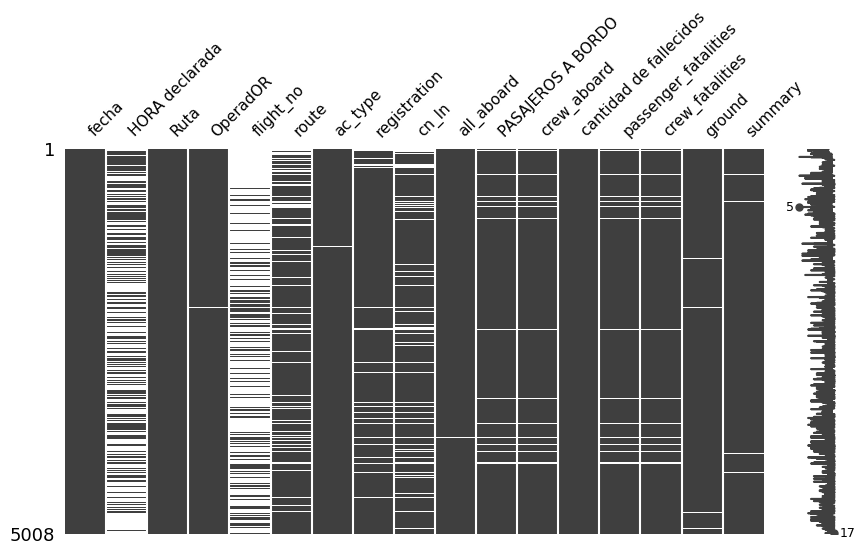

In [54]:
# Visualizamos el "gráfico matriz" y observamos algún posible patrón entre los datos faltantes.
msno.matrix(df, figsize=(10,5), fontsize=11)

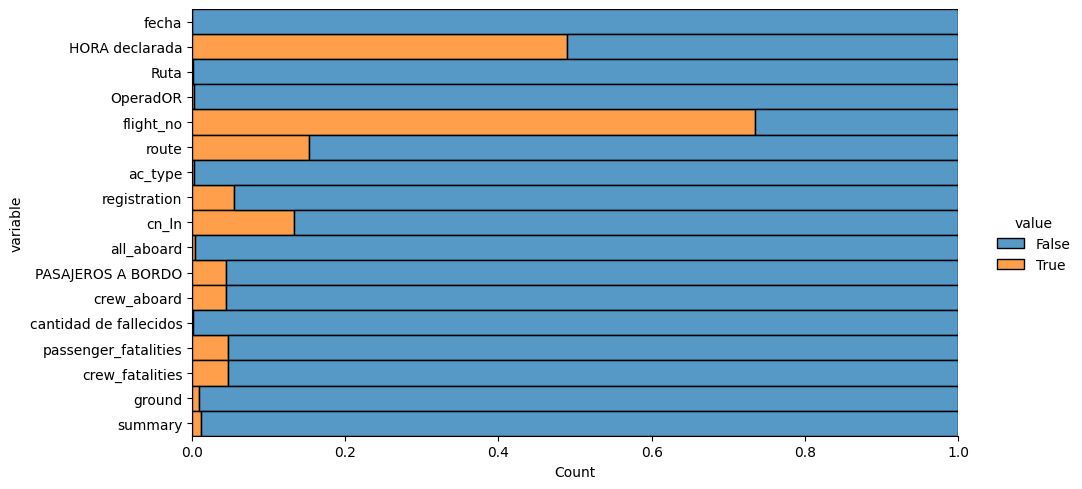

In [55]:
# Visualizamos la proporción de datos faltantes por cada variable (columnas).
df.isnull().melt().pipe(lambda df:(sns.displot(data= df, y= "variable", hue= "value", multiple= "fill", aspect= 2)))

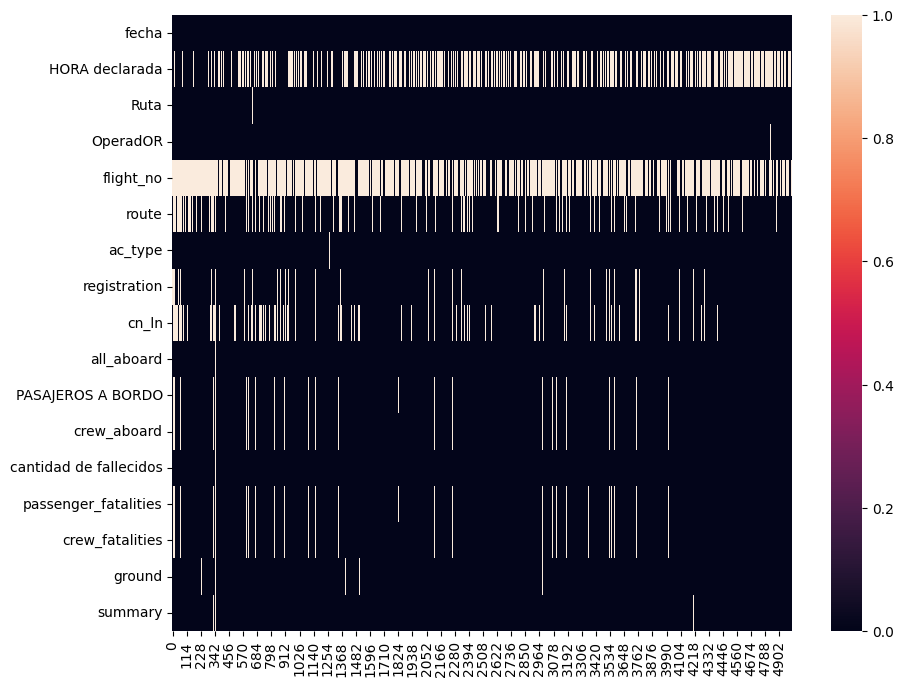

In [56]:
# Visualizamos los valores nulos por cada observación (filas).
fig, ax = plt.subplots(figsize=(10, 8))
df.isnull().transpose().pipe(lambda df: sns.heatmap(data=df, ax=ax))
plt.show()

<AxesSubplot: >

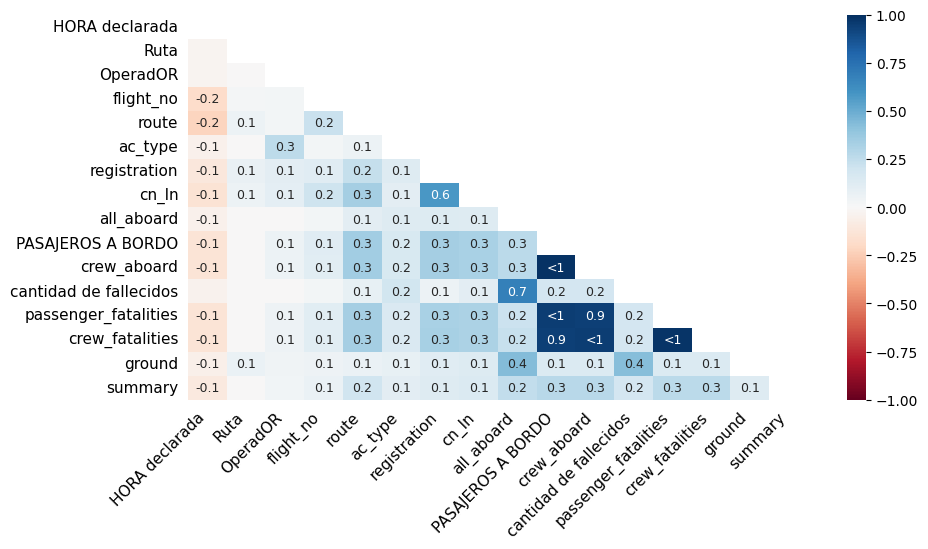

In [57]:
# Visualizamos la correlación de nulidad entre las variables.
msno.heatmap(df,  figsize=(10,5), fontsize=11)

## Análisis General

### Análisis Univariado 

In [58]:
# Estadísticas descriptivas de las variables numéricas.
df.describe()

,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground
count,4991.0,4787.0,4789.0,5000.0,4773.0,4773.0,4964.0
mean,31.121218,26.877376,4.519524,22.294,18.940708,3.587262,1.718372
std,45.479965,44.035342,3.758072,35.000385,34.06519,3.177315,55.495544
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.0,3.0,2.0,4.0,1.0,2.0,0.0
50%,16.0,12.0,4.0,11.0,7.0,3.0,0.0
75%,35.0,30.0,6.0,25.0,21.0,5.0,0.0
max,644.0,614.0,83.0,583.0,560.0,43.0,2750.0


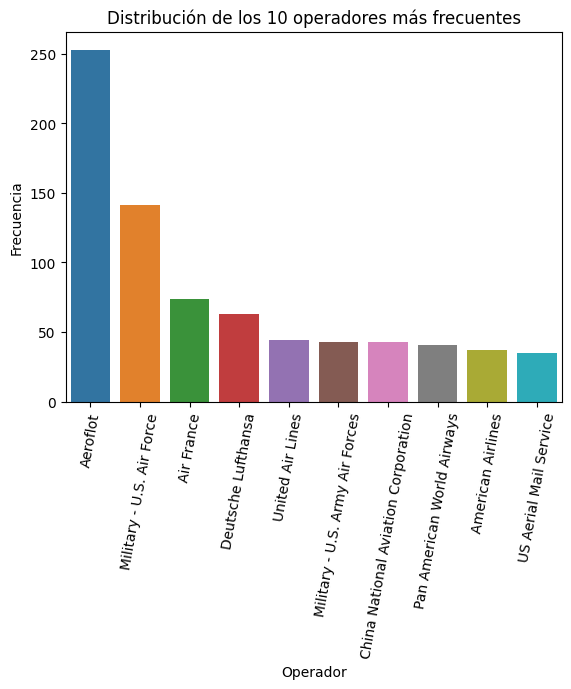

In [59]:
# Gráfico de barras para una variable categórica (mostrando las 10 categorías más frecuentes).
top_10_operadores = df['OperadOR'].value_counts().nlargest(10)
sns.barplot(x=top_10_operadores.index, y=top_10_operadores.values)
plt.title('Distribución de los 10 operadores más frecuentes')
plt.xlabel('Operador')
plt.ylabel('Frecuencia')
plt.xticks(rotation=80)
plt.show()

### Análisis Bivariado 

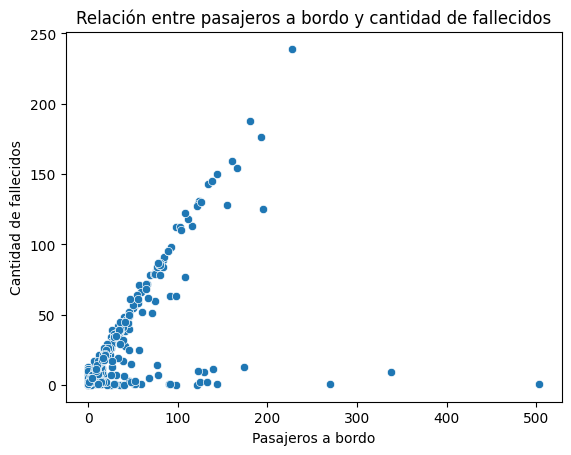

In [60]:
# Gráfico de dispersión de dos variables numéricas (mostrando una muestra aleatoria de 500 puntos).
sample_data = df.sample(n=500, random_state=42)
sns.scatterplot(x='PASAJEROS A BORDO', y='cantidad de fallecidos', data=sample_data)
plt.title('Relación entre pasajeros a bordo y cantidad de fallecidos')
plt.xlabel('Pasajeros a bordo')
plt.ylabel('Cantidad de fallecidos')
plt.show()

### Análisis Multivariado

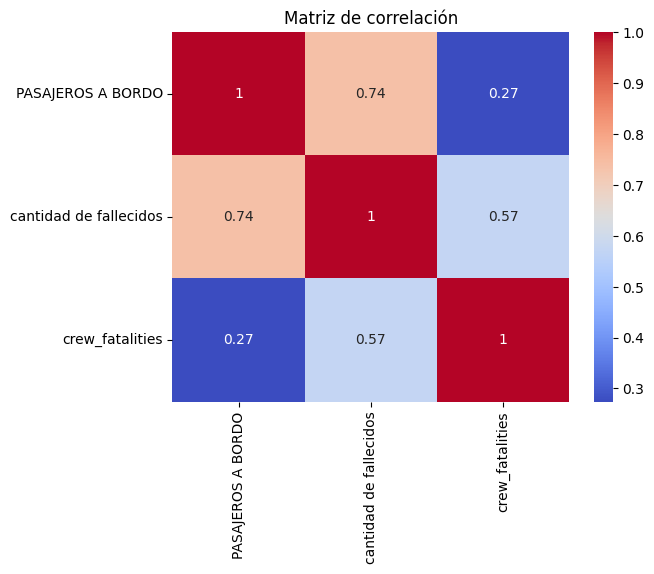

In [61]:
# Matriz de correlación entre variables numéricas
numeric_vars = ['PASAJEROS A BORDO', 'cantidad de fallecidos', 'crew_fatalities']
correlation_matrix = df[numeric_vars].corr()

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## Análisis respecto a la Tasa de Mortalidad

### Análisis Univariado 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1298: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1306: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\Users\Usuario\AppData\Local\Programs\Pyth

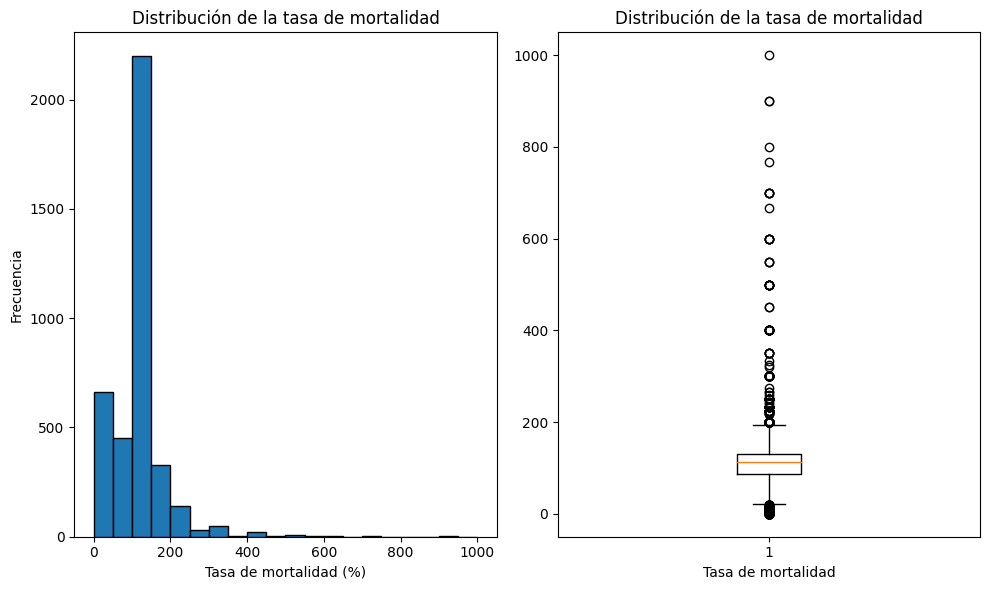

In [67]:
# Limpiar los valores incorrectos o faltantes en las columnas relevantes.
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')
df['PASAJEROS A BORDO'] = pd.to_numeric(df['PASAJEROS A BORDO'], errors='coerce')

# Calcular la tasa de mortalidad por ruta.
df['tasa_mortalidad'] = (df['cantidad de fallecidos'] / df['PASAJEROS A BORDO']) * 100

# Reemplazar valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de histograma de la tasa de mortalidad
plt.subplot(1, 2, 1)
plt.hist(df['tasa_mortalidad'].dropna(), bins=20, edgecolor='black')
plt.title('Distribución de la tasa de mortalidad')
plt.xlabel('Tasa de mortalidad (%)')
plt.ylabel('Frecuencia')

# Gráfico de caja y bigotes de la tasa de mortalidad
plt.subplot(1, 2, 2)
plt.boxplot(df['tasa_mortalidad'].dropna())
plt.title('Distribución de la tasa de mortalidad')
plt.xlabel('Tasa de mortalidad')

plt.tight_layout()
plt.show()


### Análisis Bivariado 

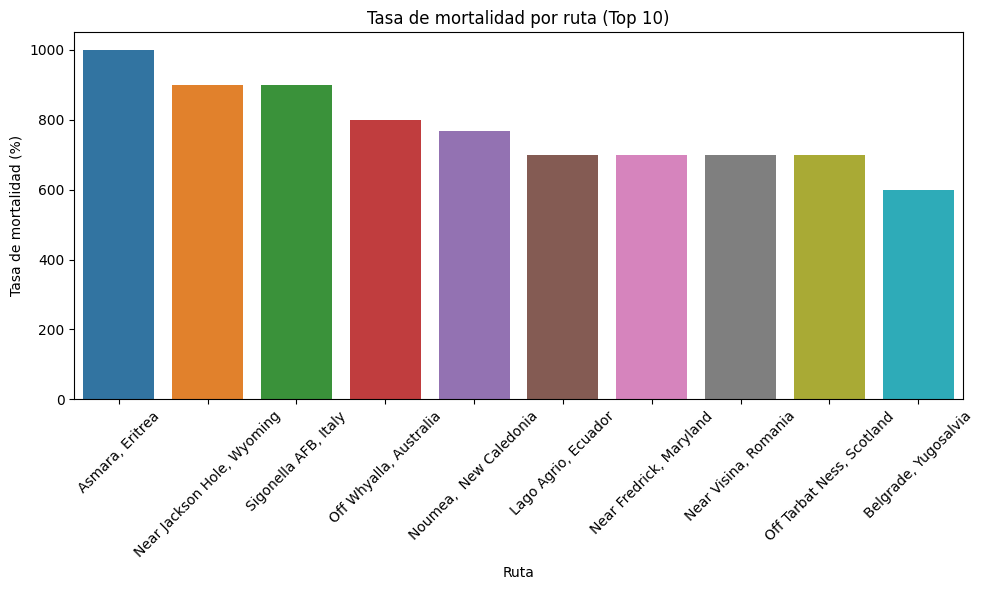

In [64]:
# Limpiar los valores incorrectos o faltantes en las columnas relevantes.
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')
df['PASAJEROS A BORDO'] = pd.to_numeric(df['PASAJEROS A BORDO'], errors='coerce')

# Calcular la tasa de mortalidad por ruta.
df['tasa_mortalidad'] = (df['cantidad de fallecidos'] / df['PASAJEROS A BORDO']) * 100

# Reemplazar valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Obtener las rutas con una mayor tasa de mortalidad (por ejemplo, las 10 rutas con mayor tasa) y ordenar de mayor a menor
top_10_rutas = df.groupby('Ruta')['tasa_mortalidad'].mean().nlargest(10).sort_values(ascending=False)

# Filtrar el dataframe solo para las rutas seleccionadas
data_filtered = df[df['Ruta'].isin(top_10_rutas.index)]

# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras de la tasa de mortalidad por ruta (solo para las rutas seleccionadas)
sns.barplot(x='Ruta', y='tasa_mortalidad', data=data_filtered, order=top_10_rutas.index)
plt.title('Tasa de mortalidad por ruta (Top 10)')
plt.xlabel('Ruta')
plt.ylabel('Tasa de mortalidad (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análisis Multivariado

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


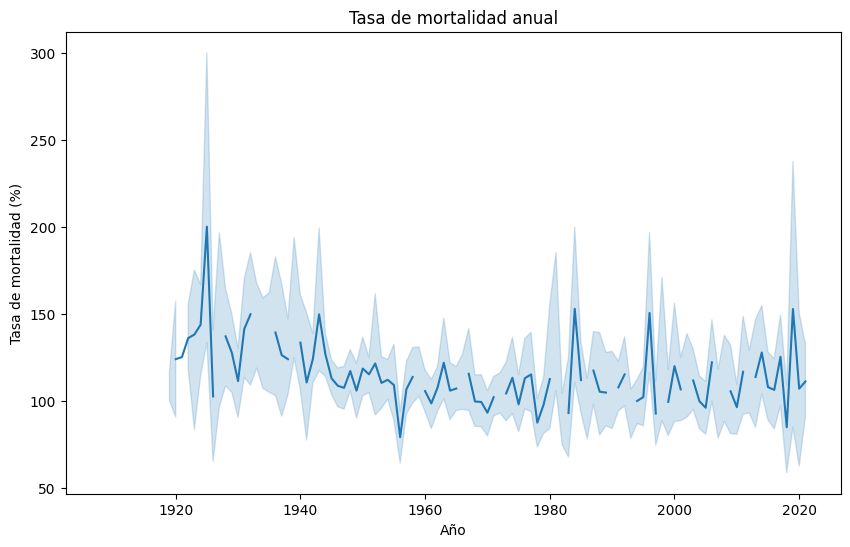

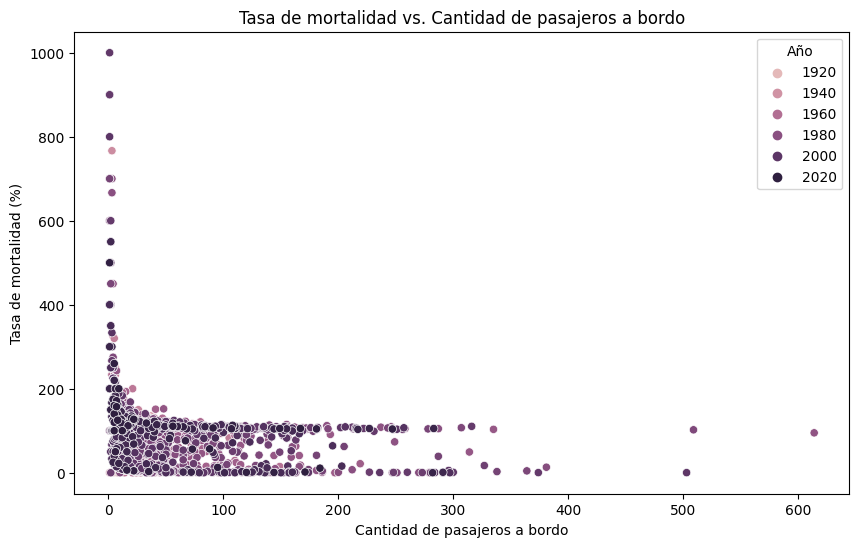

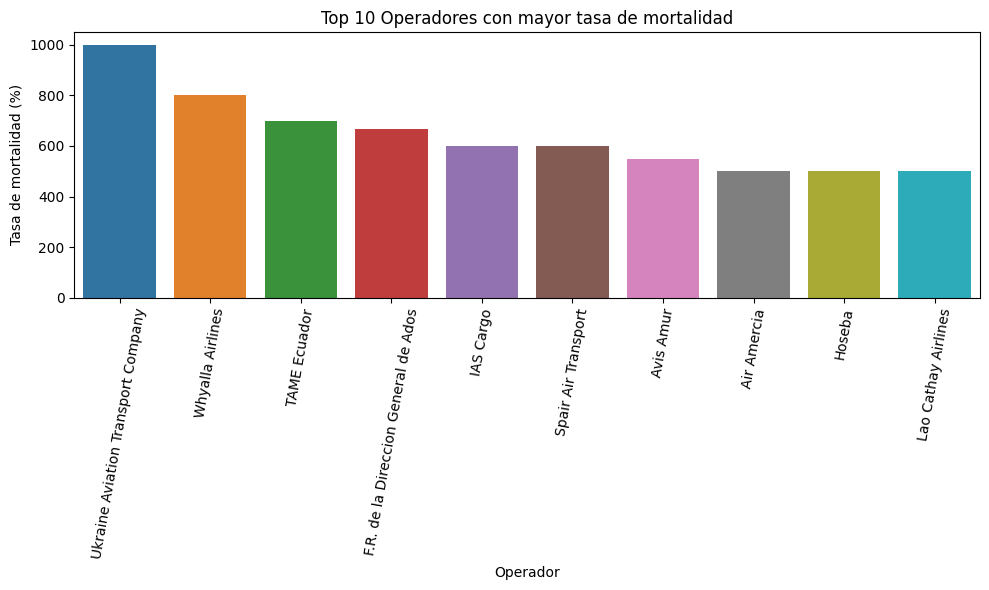

In [65]:
# Limpiar los valores incorrectos o faltantes en las columnas relevantes
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')
df['PASAJEROS A BORDO'] = pd.to_numeric(df['PASAJEROS A BORDO'], errors='coerce')

# Calcular la tasa de mortalidad por año
df['Año'] = pd.to_datetime(df['fecha']).dt.year
df['tasa_mortalidad'] = (df['cantidad de fallecidos'] / df['PASAJEROS A BORDO']) * 100

# Reemplazar valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filtrar los datos para los años deseados
start_year = 1900
end_year = 2022
data_filtered = df[(df['Año'] >= start_year) & (df['Año'] <= end_year)]

# Gráfico de línea de la tasa de mortalidad por año
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='tasa_mortalidad', data=data_filtered)
plt.title('Tasa de mortalidad anual')
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad (%)')
plt.show()

# Gráfico de dispersión de la tasa de mortalidad por año y cantidad de pasajeros a bordo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PASAJEROS A BORDO', y='tasa_mortalidad', hue='Año', data=data_filtered)
plt.title('Tasa de mortalidad vs. Cantidad de pasajeros a bordo')
plt.xlabel('Cantidad de pasajeros a bordo')
plt.ylabel('Tasa de mortalidad (%)')
plt.legend(title='Año')
plt.show()

# Calcular la tasa de mortalidad por operador
mortality_by_operator = data_filtered.groupby('OperadOR')['tasa_mortalidad'].mean().reset_index()

# Obtener el top 10 de los operadores con mayor tasa de mortalidad
top_operators = mortality_by_operator.nlargest(10, 'tasa_mortalidad')

# Gráfico de barras del top 10 de operadores con mayor tasa de mortalidad
plt.figure(figsize=(10, 6))
sns.barplot(x='OperadOR', y='tasa_mortalidad', data=top_operators)
plt.title('Top 10 Operadores con mayor tasa de mortalidad')
plt.xlabel('Operador')
plt.ylabel('Tasa de mortalidad (%)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()